<Item title:"createattachmentstest" type:Feature Layer Collection owner:rweber_osmregeo>
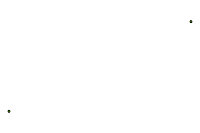

In [7]:
import logging, os, re, datetime
from IPython.display import display
from arcgis.gis import GIS

''' ********************** SCRIPT CONFIGURATION START ********************** '''

#What is the ID of the Feature Layer you want to Add attachments to?
FeatureLayerId = ''

#What are your ArcGIS Enterprise/ArcGIS Online credentials? This is case sensitive.
PortalUserName = ''
PortalPassword = ''
PortalUrl = ''

#Where are your attachments stored?
attachmentFolder = r''

#Set to False if ArcGIS Enterprise cert is not valid
PortalCertVerification = True
#Connect to GIS, and get Feature Layer information
if PortalUserName == '' and PortalPassword == '':
    gis = GIS()
else:
    gis = GIS(PortalUrl, PortalUserName, PortalPassword, verify_cert=PortalCertVerification)

#Display item
itemObject = gis.content.get(FeatureLayerId)

display(itemObject)


In [8]:
# #Loop through layers in Feature Layer
for i in range(len(itemObject.layers)):
    featureLayer = itemObject.layers[i]
 #Skip layer if attachments are not enabled
    if featureLayer.properties.hasAttachments == True:
#Query to get list of all records to start with
        query1 = featureLayer.query(where='1=1', return_all_records='true')
    #Create dataframe object and get list of attributes to match attachments to
    for name in query1.df['name']:
        #Search specified folder for attachments
        for root, dirs, files in os.walk(attachmentFolder): 
            #List files in folder
            for filename in files:
                #look for files that contain the attributes from the dataframe object in their name 
                attachment = re.findall((name), filename)
                if not attachment: continue
                #list the files that have a match in the name
                for pic in attachment:
                    #isolate those features in the dataframe object that match the name of the files to be attached
                    features = query1.df['name'] == pic
                    #Iterate through the features in the df object and list only their ObjectID
                    for index, row in query1.df[features].iterrows():
                        realOID = row['OBJECTID']
                        #set the full file path to the files to be attached
                        filePath = os.path.abspath(os.path.join(root, filename))
                        #attach the appropriate files
                        featureLayer.attachments.add(realOID, filePath)
                        
                    else:
                        continue

[{'id': 90, 'globalId': '731aed5c-2f49-4c9f-8696-2c7e34e443fc', 'parentGlobalId': '02248e6c-6971-47b8-a098-d8db859ab6eb', 'name': '6-4-RTD (2).jpg', 'contentType': 'image/jpeg', 'size': 127210, 'keywords': ''}]
[{'id': 90, 'globalId': '731aed5c-2f49-4c9f-8696-2c7e34e443fc', 'parentGlobalId': '02248e6c-6971-47b8-a098-d8db859ab6eb', 'name': '6-4-RTD (2).jpg', 'contentType': 'image/jpeg', 'size': 127210, 'keywords': ''}, {'id': 91, 'globalId': '6cee90e7-4c48-4ce6-b8f2-a66c44485055', 'parentGlobalId': '02248e6c-6971-47b8-a098-d8db859ab6eb', 'name': '6-5-RTD.jpg', 'contentType': 'image/jpeg', 'size': 160173, 'keywords': ''}]
[{'id': 92, 'globalId': 'b094ddfe-b0a2-48d9-9a56-8867b8dff03b', 'parentGlobalId': 'cd91ea45-4eab-4e7b-b40b-a9e2d70da8a7', 'name': '7-6-Tire Sale.jpg', 'contentType': 'image/jpeg', 'size': 100880, 'keywords': ''}]
